### Task: Determine the eligibility for granting a Home Loan
Objective of this notebook is:

1.   To understand the patterns in the data.
2.   How to Handle the categorical features.
3. How to deal with missing data.
4. Feature Engineering
5. Finding the most important features while taking the decision of granting a loan application.
6. Understanding the Normalization and standardisation of the data.

#### Load the data

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('loan.csv')
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [3]:
data.shape

(614, 13)

In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Basic data exploration

In [5]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
## Drop unnecessary columns
data = data.drop('Loan_ID', axis=1)

In [10]:
data.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [25]:
## Applicant Income here is monthly
data.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [12]:
data.describe(include = ['object'])

Gender Married Dependents Education Self_Employed Property_Area  \
count     601     611        599       614           582           614   
unique      2       2          4         2             2             3   
top      Male     Yes          0  Graduate            No     Semiurban   
freq      489     398        345       480           500           233   

       Loan_Status  
count          614  
unique           2  
top              Y  
freq           422

In [13]:
data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [16]:
#missing values
data.isna().sum() / data.shape[0] * 100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [19]:
## separeate categorical and numeric features.
# catgeorical and numerical columns
cat_cols = data.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols.remove('Loan_Status')
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [18]:
num_cols = data.dtypes !='object'
num_cols = list(num_cols[num_cols].index)
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

#### Univariate Data Analysis

In [20]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [21]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

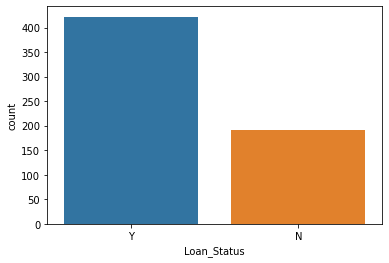

In [22]:
sns.countplot(data=data, x='Loan_Status')
plt.show()

In [23]:
target = 'Loan_Status'
data[target].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

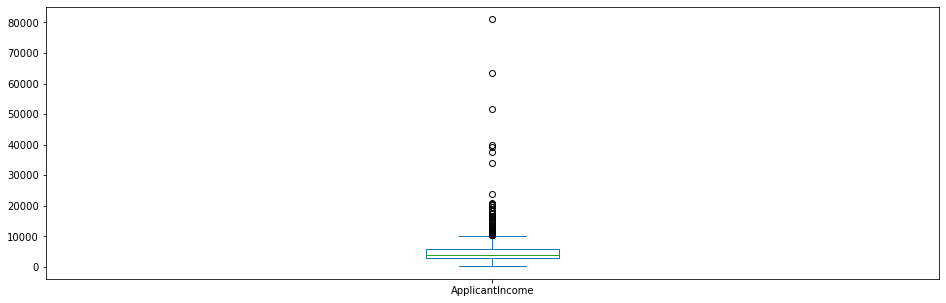

In [24]:
plt.figure()
data["ApplicantIncome"].plot.box(figsize=(16, 5))

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

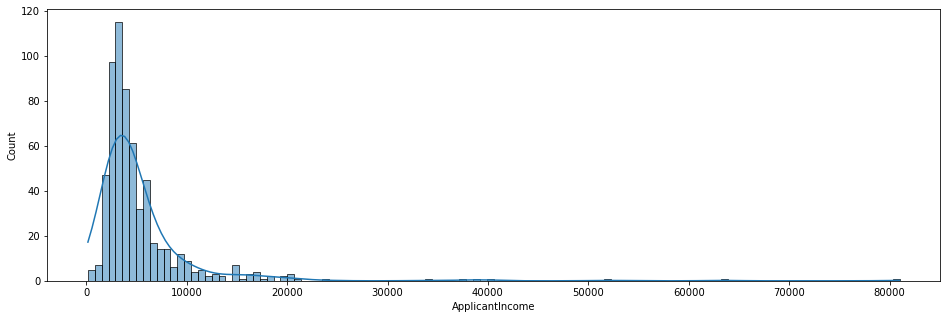

In [31]:
plt.figure(figsize=(16, 5))
sns.histplot(data["ApplicantIncome"], kde=True)

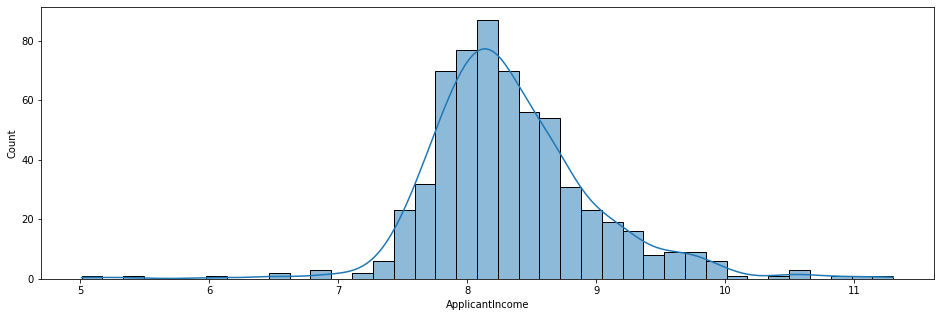

In [33]:
plt.figure(figsize=(16, 5))
sns.histplot(np.log(data["ApplicantIncome"]), kde=True)

plt.show()

<AxesSubplot:>

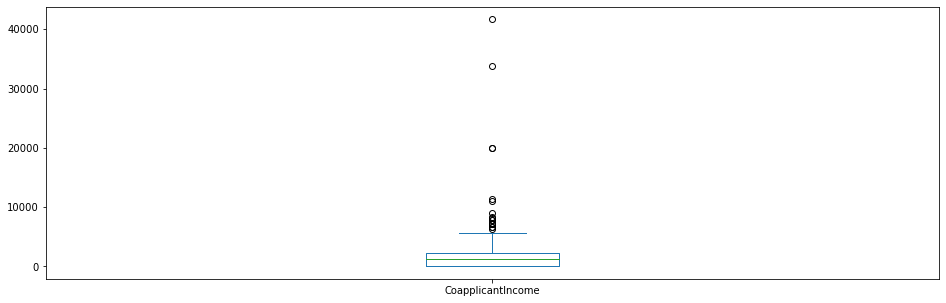

In [35]:
## CoapplicantIncome
plt.figure()
data["CoapplicantIncome"].plot.box(figsize=(16, 5))

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

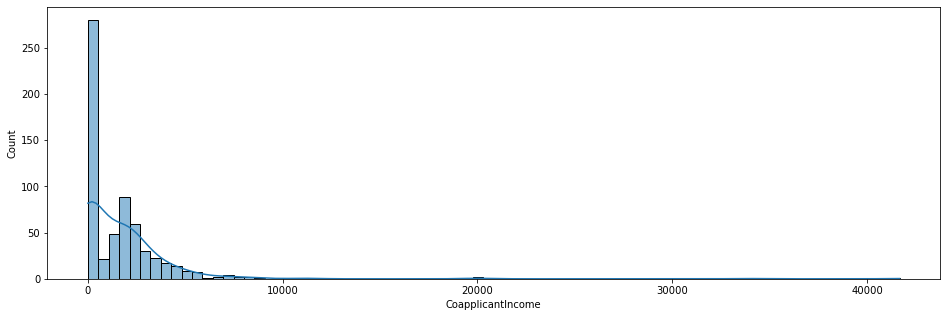

In [37]:
plt.figure(figsize=(16, 5))
sns.histplot(data["CoapplicantIncome"], kde=True)

In [38]:
data.groupby("Loan_Status").mean()['ApplicantIncome']

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

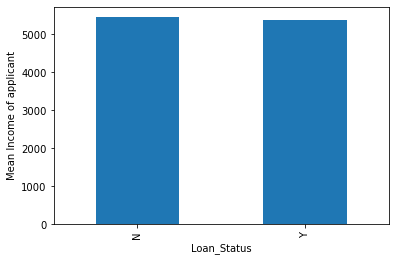

In [39]:
data.groupby("Loan_Status").mean()['ApplicantIncome'].plot.bar()
plt.ylabel("Mean Income of applicant")
plt.show()

In [43]:
## H0: mean1 = mean2
## Ha: mean1 != mean2
sample1 = data[data["Loan_Status"] == "Y"]["ApplicantIncome"]
sample2 = data[data["Loan_Status"] == "N"]["ApplicantIncome"]
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-0.11650844828724542, pvalue=0.907287812130518)

In [45]:
## H0: Same distribution
## Ha: Different Distribution
stats.ks_2samp(sample1, sample2)

KstestResult(statistic=0.04393759873617693, pvalue=0.9480203334325084)

In [49]:
sample1.describe()

count      422.000000
mean      5384.068720
std       5765.441615
min        210.000000
25%       2877.500000
50%       3812.500000
75%       5771.500000
max      63337.000000
Name: ApplicantIncome, dtype: float64

In [48]:
sample2.describe()

count      192.000000
mean      5446.078125
std       6819.558528
min        150.000000
25%       2885.000000
50%       3833.500000
75%       5861.250000
max      81000.000000
Name: ApplicantIncome, dtype: float64

#### Bin Income

In [50]:
bins=[0,2500, 4000, 6000, 8000, 10000, 20000, 40000, 81000]
group=['Low','Average','medium', 'H1', 'h2', 'h3', 'h4' , 'Very high']

In [51]:
data['Income_bin']= pd.cut(data['ApplicantIncome'],bins,labels=group)

In [53]:
pd.crosstab(data["Income_bin"],data["Loan_Status"], margins=True)

Loan_Status    N    Y  All
Income_bin                
Low           34   74  108
Average       67  159  226
medium        45   98  143
H1            20   34   54
h2             9   22   31
h3            13   27   40
h4             3    6    9
Very high      1    2    3
All          192  422  614

In [55]:
## H0: Variables are independent
## Ha: Variables are dependent
val = pd.crosstab(index=data["Income_bin"], columns=data["Loan_Status"]).values
stats.chi2_contingency(val) # chi_stat, p_value, df, expected_values

(1.2420001711303135,
 0.9899274842922701,
 7,
 array([[ 33.77198697,  74.22801303],
        [ 70.67100977, 155.32899023],
        [ 44.71661238,  98.28338762],
        [ 16.88599349,  37.11400651],
        [  9.69381107,  21.30618893],
        [ 12.50814332,  27.49185668],
        [  2.81433225,   6.18566775],
        [  0.93811075,   2.06188925]]))

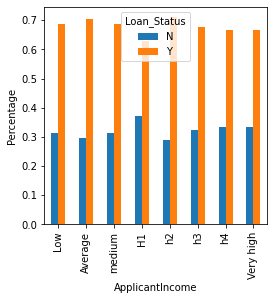

In [56]:
Income_bin = pd.crosstab(data["Income_bin"],data["Loan_Status"])

Income_bin.div(Income_bin.sum(axis=1),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

In [57]:
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]
data.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status Income_bin  TotalIncome  
0         Urban           Y     medium       5849.0  
1         Rural           N     medium       6091.0  
2         Urban           Y    Average       3000.0  
3         Urban           Y    Average       4941.0  
4         Urban           Y     medium       6000.0

In [59]:
bins = [0,3000,5000,8000,81000]
group = ['Low','Average','High','Very High']
data["TotalIncome_bin"] = pd.cut(data["TotalIncome"],bins,labels=group)

In [60]:
vals = pd.crosstab(data["TotalIncome_bin"], data["Loan_Status"])
vals

Loan_Status       N    Y
TotalIncome_bin         
Low              20   27
Average          69  154
High             61  151
Very High        42   90

In [63]:
## H0: Variables are independent
## Ha: Variables are dependent
stats.chi2_contingency(vals) # chi_stat, p-value, dof, expec

(3.428480885250809,
 0.3301570564076713,
 3,
 array([[ 14.6970684 ,  32.3029316 ],
        [ 69.73289902, 153.26710098],
        [ 66.29315961, 145.70684039],
        [ 41.27687296,  90.72312704]]))

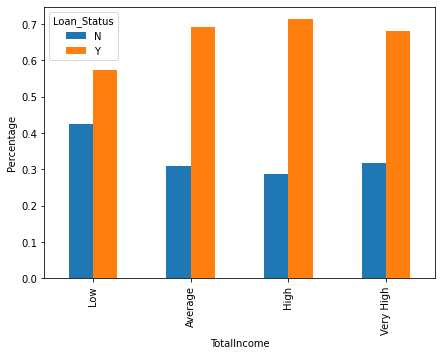

In [64]:
TotalIncome = pd.crosstab(data["TotalIncome_bin"],data["Loan_Status"])
TotalIncome.div(TotalIncome.sum(axis = 1),axis=0).plot(kind='bar', figsize=(7,5))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

#### Loan Amount and Loan Term

In [65]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [66]:
data['Loan_Amount_Term'] = (data['Loan_Amount_Term']/12).astype('float')

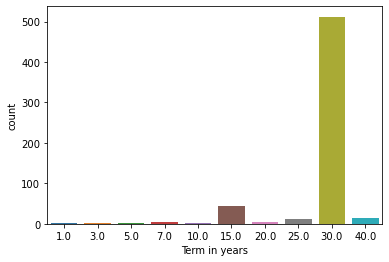

In [67]:
sns.countplot(x='Loan_Amount_Term', data=data)
plt.xlabel("Term in years")
plt.show()

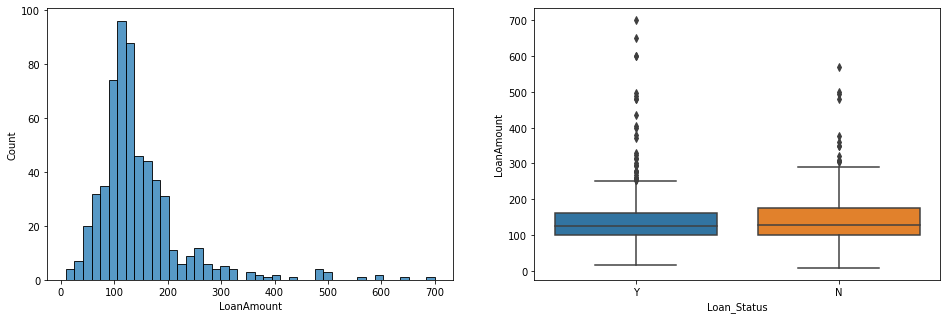

In [68]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.histplot(data['LoanAmount']);

plt.subplot(122)
sns.boxplot(data=data, x='Loan_Status', y = 'LoanAmount')

plt.show()

#### Homework
Think of ability to pay EMI as a feature, and come up with the right feature engineering to get a better relation with target (Loan Status)

Use loan amount, loan term, income, guess expense, finally ability to pay EMI.